In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Housing.csv')

In [3]:
df.head() #Lets check what the data looks like

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishing status
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.info() #Lets get more info on each column and their data types 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   price              545 non-null    int64 
 1   area               545 non-null    int64 
 2   bedrooms           545 non-null    int64 
 3   bathrooms          545 non-null    int64 
 4   stories            545 non-null    int64 
 5   mainroad           545 non-null    object
 6   guestroom          545 non-null    object
 7   basement           545 non-null    object
 8   hotwaterheating    545 non-null    object
 9   airconditioning    545 non-null    object
 10  parking            545 non-null    int64 
 11  prefarea           545 non-null    object
 12  furnishing status  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
df.isnull().sum() #Lets check the presence of null values and duplicate rows.

price                0
area                 0
bedrooms             0
bathrooms            0
stories              0
mainroad             0
guestroom            0
basement             0
hotwaterheating      0
airconditioning      0
parking              0
prefarea             0
furnishing status    0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.describe() #Lets get some insights using descriptive stats

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [8]:
df.select_dtypes(include = ['int64']).corr() #Lets check how all the numeric columns are correlated

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


<Axes: >

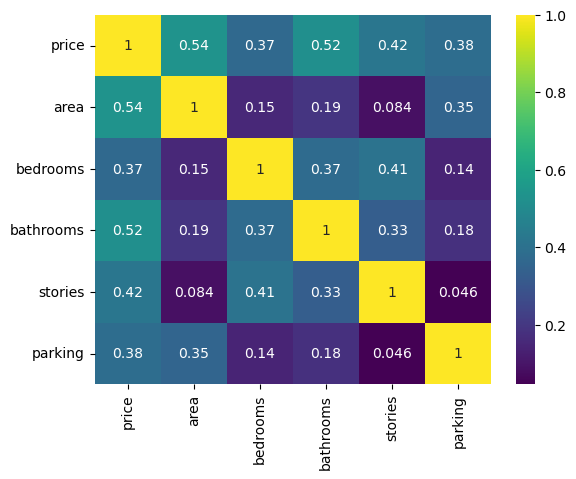

In [9]:
sns.heatmap(df.select_dtypes(include = ['int64']).corr(), cmap='viridis',annot=True)

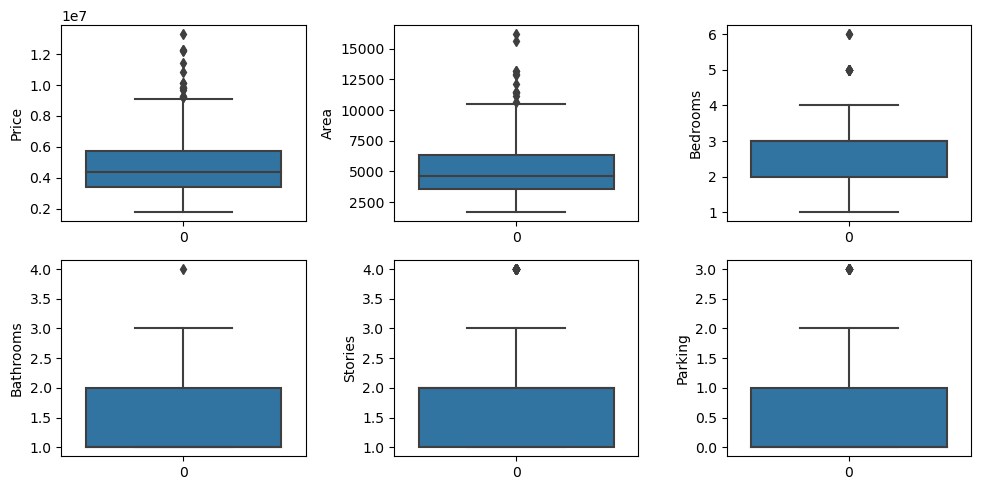

In [10]:
#Lets explore Uni-variate analysis of the numeric columns
fig, axs = plt.subplots(2,3, figsize=(10,5))
plt1 = sns.boxplot(df['price'], ax=axs[0,0])
plt1.set_ylabel('Price')
plt2 = sns.boxplot(df['area'], ax=axs[0,1])
plt2.set_ylabel('Area')
plt3 = sns.boxplot(df['bedrooms'], ax=axs[0,2])
plt3.set_ylabel('Bedrooms')
plt4 = sns.boxplot(df['bathrooms'], ax=axs[1,0])
plt4.set_ylabel('Bathrooms')
plt5 = sns.boxplot(df['stories'], ax=axs[1,1])
plt5.set_ylabel('Stories')
plt6 = sns.boxplot(df['parking'], ax=axs[1,2])
plt6.set_ylabel('Parking')

plt.tight_layout()

<Axes: xlabel='airconditioning', ylabel='bedrooms'>

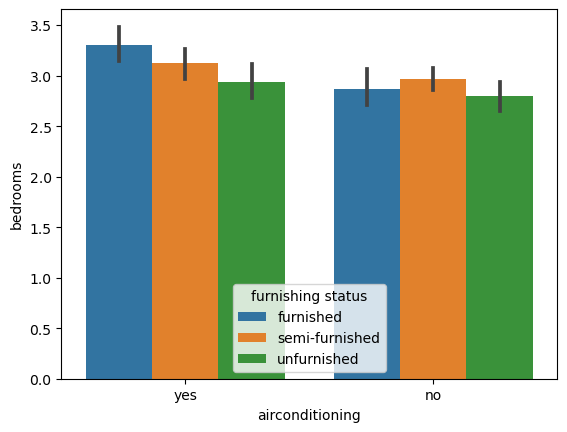

In [11]:
#Lets explore multivariate plots combing numeric and categorical columns.
#Based on the hypothesis that air conditioning may be dependent on the number of rooms & furnishing type.
sns.barplot(x = df['airconditioning'],y = df['bedrooms'], hue = df['furnishing status'])

<Axes: xlabel='hotwaterheating', ylabel='bathrooms'>

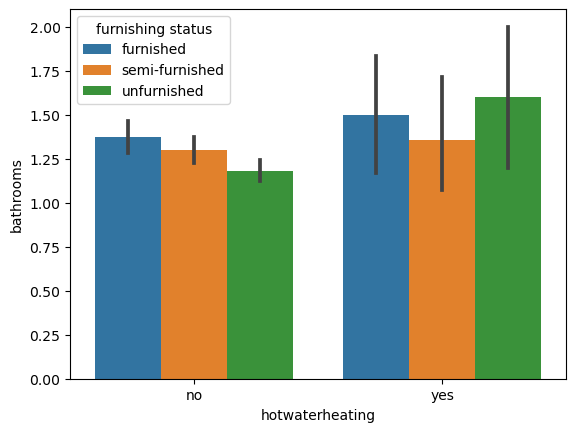

In [12]:
sns.barplot(x = df['hotwaterheating'], y = df['bathrooms'], hue = df['furnishing status'])

{'whiskers': [<matplotlib.lines.Line2D at 0x266d4f97090>,
 'caps': [<matplotlib.lines.Line2D at 0x266d4c9f190>,
 'boxes': [<matplotlib.lines.Line2D at 0x266d4f96310>],
 'medians': [<matplotlib.lines.Line2D at 0x266d4f9dc90>],
 'fliers': [<matplotlib.lines.Line2D at 0x266d48c6190>],
 'means': []}

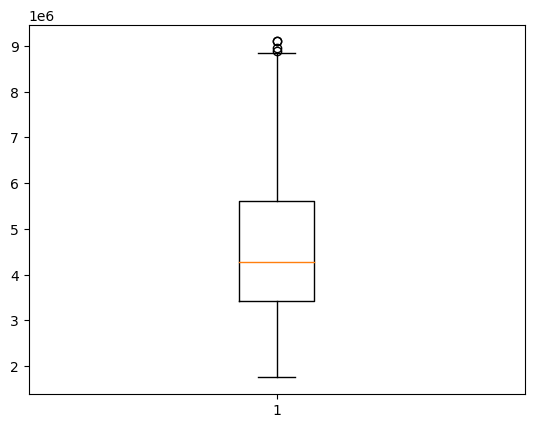

In [13]:
#Lets filter outliers of price column
Q1 = df.price.quantile(0.25)
Q3 = df.price.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.price >= Q1 - 1.5*IQR) & (df.price <= Q3 + 1.5*IQR)]

plt.boxplot(df.price)

{'whiskers': [<matplotlib.lines.Line2D at 0x266d500d850>,
 'caps': [<matplotlib.lines.Line2D at 0x266d4fd7190>,
 'boxes': [<matplotlib.lines.Line2D at 0x266d500cc50>],
 'medians': [<matplotlib.lines.Line2D at 0x266d5010610>],
 'fliers': [<matplotlib.lines.Line2D at 0x266d4fbf190>],
 'means': []}

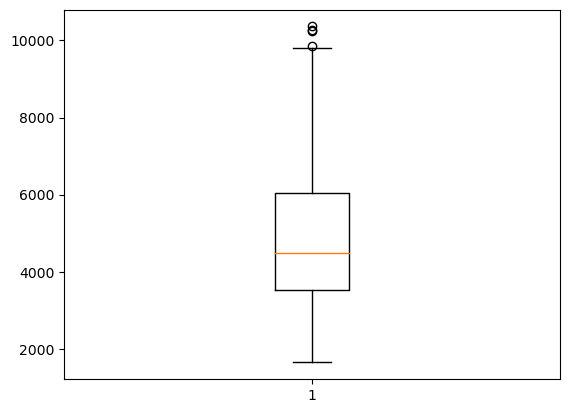

In [14]:
#Lets filter outliers of area column
Q1 = df.area.quantile(0.25)
Q3 = df.area.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.area >= Q1 - 1.5*IQR) & (df.area <= Q3 + 1.5*IQR)]
plt.boxplot(df.area)

In [15]:
#Lets check the shape of the Data Set after removal of all the outliers
df.shape

(517, 13)

{'whiskers': [<matplotlib.lines.Line2D at 0x266d5067350>,
 'caps': [<matplotlib.lines.Line2D at 0x266d504f190>,
 'boxes': [<matplotlib.lines.Line2D at 0x266d5066810>],
 'medians': [<matplotlib.lines.Line2D at 0x266d507a090>],
 'fliers': [<matplotlib.lines.Line2D at 0x266d507ab10>],
 'means': []}

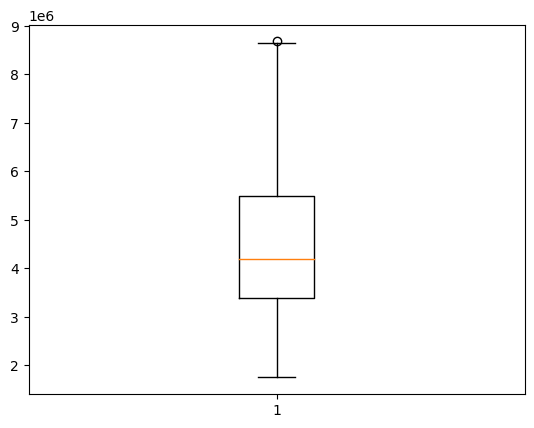

In [16]:
Q1 = df.price.quantile(0.25)
Q3 = df.price.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.price >= Q1 - 1.5*IQR) & (df.price <= Q3 + 1.5*IQR)]

plt.boxplot(df.price)

{'whiskers': [<matplotlib.lines.Line2D at 0x266d50e9f10>,
 'caps': [<matplotlib.lines.Line2D at 0x266d50eb510>,
 'boxes': [<matplotlib.lines.Line2D at 0x266d50e9350>],
 'medians': [<matplotlib.lines.Line2D at 0x266d50f0a90>],
 'fliers': [<matplotlib.lines.Line2D at 0x266d50f1490>],
 'means': []}

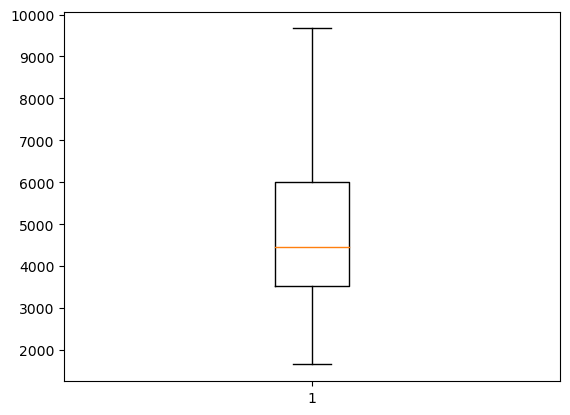

In [17]:
Q1 = df.area.quantile(0.25)
Q3 = df.area.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.area >= Q1 - 1.5*IQR) & (df.area <= Q3 + 1.5*IQR)]
plt.boxplot(df.area)

In [18]:
df.shape

(506, 13)

In [19]:
#Lets now encode the categorical columns and concat with original data

In [20]:
cat_enc = pd.get_dummies(df[['furnishing status','mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']], drop_first = True).astype('int64')
df1 = df.drop(['furnishing status','mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea'], axis = 1)
df_final = pd.concat([df1,cat_enc], axis = 1)
df_final.head()
df_final.shape

(506, 14)

In [21]:
cat_enc

,furnishing status_semi-furnished,furnishing status_unfurnished,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes
21,0,1,1,1,1,0,1,0
22,0,0,1,1,1,0,1,0
23,0,0,1,1,1,0,1,0
24,0,0,1,0,0,0,1,0
25,0,0,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...
540,0,1,1,0,1,0,0,0
541,1,0,0,0,0,0,0,0
542,0,1,1,0,0,0,0,0
543,0,0,0,0,0,0,0,0


In [22]:
#Importing Knn and other required functions from sklearn for model fitting.
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_percentage_error,mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [23]:
#Separating Features and Target variable and storing them in separate varuiables, x and y.
x = df_final.drop('price', axis = 1)
y = df_final['price']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 42)

In [24]:
#Fitting the model using kNN.
scaler = MinMaxScaler()
scaler.fit(x_train)
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [25]:
k_values = np.linspace(1,100,100) #Initializing a array with k values from 1 to 100
k_value = []
for i in k_values:
    k_value.append(int(i))
train_r_squared = []
train_mape = []
test_mape = []
train_mse = []
test_mse = []
for k in k_value: #Looping the evaluation metrics for different k values as stored in the above array.
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    knn_regressor.fit(x_train_scaled, y_train)
    y_train_pred = knn_regressor.predict(x_train_scaled)
    y_test_pred = knn_regressor.predict(x_test_scaled)
    train_r_squared.append(r2_score(y_train, y_train_pred))
    train_mape.append(np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100)
    test_mape.append(np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100)
    train_mse.append(np.mean(np.abs((y_train - y_train_pred)**2 / len(y_train))))
    test_mse.append(np.mean(np.abs((y_test - y_test_pred)**2 / len(y_test))))
evaluation_df = pd.DataFrame({ #Storing the results in a DataFrame
    'K': k_value,
    'Train R-squared': train_r_squared,
    'Train MAPE': train_mape,
    'Test MAPE': test_mape,
    'Train MSE': train_mse,
    'Test MSE': test_mse,
})
evaluation_df

,K,Train R-squared,Train MAPE,Test MAPE,Train MSE,Test MSE
0,1,0.996867,0.300263,21.058026,1.918889e+07,1.104697e+10
1,2,0.791683,11.381408,19.532692,1.275805e+09,8.791550e+09
2,3,0.714692,13.438259,18.829335,1.747328e+09,7.678247e+09
3,4,0.678098,14.120370,18.741459,1.971443e+09,7.666686e+09
4,5,0.651544,14.960128,18.570629,2.134069e+09,7.551796e+09
...,...,...,...,...,...,...
95,96,0.359504,19.123146,22.621309,3.922629e+09,1.144341e+10
96,97,0.357506,19.170060,22.710683,3.934865e+09,1.152379e+10
97,98,0.355706,19.223389,22.809349,3.945889e+09,1.159299e+10
98,99,0.354462,19.258164,22.906101,3.953505e+09,1.163414e+10


<Axes: xlabel='K', ylabel='Train MAPE'>

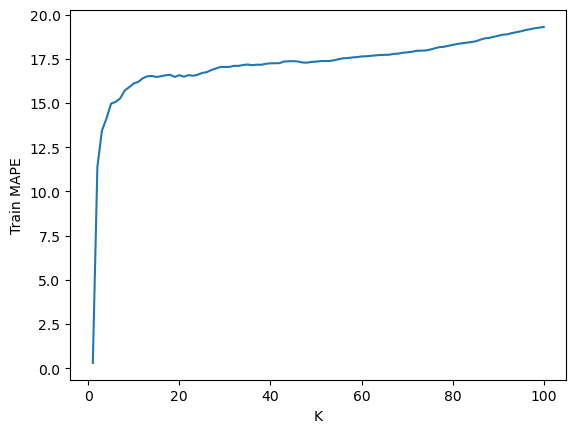

In [27]:
sns.lineplot(data = evaluation_df, x = 'K', y = 'Train MAPE')

# Decision Tree Regressor

In [35]:
from sklearn.tree import DecisionTreeRegressor, plot_tree #Importing DT algorithm from sklearn
train_mape = []
test_mape = []
train_mse = []
test_mse = []
mxdepth = [1,2,3,4,5,6,7,8,9,10] #Storing different max-depth values in an list to parse later.
for m in mxdepth:
    dtr = DecisionTreeRegressor(max_depth = m, random_state=42)
    dtr.fit(x_train, y_train)
    y_train_pred = dtr.fit(x_train, y_train).predict(x_train)
    y_test_pred = dtr.fit(x_train, y_train).predict(x_test)
    train_mape.append(np.abs(np.mean((y_train_pred-y_train)/y_train))*100)
    test_mape.append(np.abs(np.mean((y_test_pred-y_test)/y_test))*100)
    train_mse.append(np.mean(np.abs((y_train - y_train_pred)**2 / len(y_train))))
    test_mse.append(np.mean(np.abs((y_test - y_test_pred)**2 / len(y_test))))
dtr_result = pd.DataFrame({
    'Max Depth': mxdepth,
    'Train MAPE': train_mape,
    'Test MAPE': test_mape,
    'Train MSE': train_mse,
    'Test MSE': test_mse,
})
dtr_result

,Max Depth,Train MAPE,Test MAPE,Train MSE,Test MSE
0,1,7.835669,9.911237,4.193088e+09,1.349142e+10
1,2,6.205423,8.573102,3.294639e+09,1.033305e+10
2,3,5.205315,6.972289,2.781299e+09,9.270108e+09
3,4,4.087142,5.940682,2.193374e+09,7.290955e+09
4,5,3.275135,4.754136,1.712631e+09,7.640710e+09
5,6,2.486489,5.579180,1.228515e+09,7.451376e+09
6,7,1.979263,4.981056,9.194398e+08,8.253755e+09
7,8,1.515378,4.599523,6.995048e+08,7.874053e+09
8,9,0.994834,3.850033,4.668772e+08,7.934342e+09
9,10,0.723225,3.483982,3.473348e+08,8.201646e+09


In [ ]:
#To understand the impact of dropping features on the Train and Test MAPE, MSE. I decided to drop a prominent feature 'Area'.

# Dropping one feature(area)

In [30]:
scaler = MinMaxScaler()
scaler.fit(x_train.drop(['area'], axis =1))
scaler.fit(x_train.drop(['area'], axis =1))
x_train_scaled = scaler.transform(x_train.drop(['area'], axis =1))
x_test_scaled = scaler.transform(x_test.drop(['area'], axis =1))

In [37]:
k_values = [1,3, 5, 7, 9, 11, 13, 15]
train_r_squared = []
train_mape = []
test_mape = []
train_mse = []
test_mse = []
bias = []
var = []
for k in k_values:
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    knn_regressor.fit(x_train_scaled, y_train)
    y_train_pred = knn_regressor.predict(x_train_scaled)
    y_test_pred = knn_regressor.predict(x_test_scaled)
    train_r_squared.append(r2_score(y_train, y_train_pred))
    train_mape.append(np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100)
    test_mape.append(np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100)
    train_mse.append(np.mean(np.abs((y_train - y_train_pred)**2 / len(y_train))))
    test_mse.append(np.mean(np.abs((y_test - y_test_pred)**2 / len(y_test))))
evaluation_df = pd.DataFrame({
    'K': k_values,
    'Train R-squared': train_r_squared,
    'Train MAPE': train_mape,
    'Test MAPE': test_mape,
    'Train MSE': train_mse,
    'Test MSE': test_mse,
})
evaluation_df

,K,Train R-squared,Train MAPE,Test MAPE,Train MSE,Test MSE
0,1,0.850789,6.998821,23.039953,9.138241e+08,1.084062e+10
1,3,0.687260,14.328748,18.986490,1.915332e+09,8.875301e+09
2,5,0.599006,15.793414,18.888445,2.455828e+09,8.302005e+09
3,7,0.591367,15.865814,18.911575,2.502613e+09,8.345440e+09
4,9,0.572322,16.427483,18.551353,2.619255e+09,7.764282e+09
5,11,0.546950,16.897390,18.836895,2.774642e+09,7.913085e+09
6,13,0.525226,17.125619,19.265328,2.907687e+09,8.070130e+09
7,15,0.517272,17.308807,19.744753,2.956398e+09,8.515902e+09


In [33]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
train_mape = []
test_mape = []
train_mse = []
test_mse = []
mxdepth = [1,2,3,4,5,6,7,8,9,10]
for m in mxdepth:
    dtr = DecisionTreeRegressor(max_depth = m, random_state=42)
    dtr.fit(x_train_scaled, y_train)
    y_train_pred = dtr.fit(x_train_scaled, y_train).predict(x_train_scaled)
    y_test_pred = dtr.fit(x_train_scaled, y_train).predict(x_test_scaled)
    train_mape.append(np.abs(np.mean((y_train_pred-y_train)/y_train))*100)
    test_mape.append(np.abs(np.mean((y_test_pred-y_test)/y_test))*100)
    train_mse.append(np.mean(np.abs((y_train - y_train_pred)**2 / len(y_train))))
    test_mse.append(np.mean(np.abs((y_test - y_test_pred)**2 / len(y_test))))
dtr_result = pd.DataFrame({
    'Max Depth': mxdepth,
    'Train MAPE': train_mape,
    'Test MAPE': test_mape,
    'Train MSE': train_mse,
    'Test MSE': test_mse,
    'test-train mape': np.array(test_mape)-np.array(train_mape),
    'test-train mse': np.array(test_mse) - np.array(train_mse)
})
dtr_result

,Max Depth,Train MAPE,Test MAPE,Train MSE,Test MSE,test-train mape,test-train mse
0,1,9.189343,10.130624,4.915776e+09,1.351257e+10,0.941281,8.596792e+09
1,2,7.665901,8.673682,4.009573e+09,9.897054e+09,1.007781,5.887481e+09
2,3,6.427881,6.731874,3.420825e+09,8.664386e+09,0.303993,5.243561e+09
3,4,5.200970,5.391532,2.781346e+09,8.044885e+09,0.190562,5.263538e+09
4,5,4.123866,3.145196,2.158043e+09,8.540211e+09,-0.978670,6.382169e+09
5,6,3.283714,2.744733,1.647449e+09,8.715739e+09,-0.538982,7.068291e+09
6,7,2.632619,0.524671,1.216381e+09,9.537917e+09,-2.107948,8.321536e+09
7,8,2.040875,0.601095,8.401438e+08,1.030667e+10,-1.439780,9.466524e+09
8,9,1.710761,0.439636,6.379574e+08,1.079516e+10,-1.271124,1.015721e+10
9,10,1.475220,0.291664,5.084552e+08,9.779681e+09,-1.183556,9.271226e+09
